<a href="https://colab.research.google.com/github/unusualpineapple/New-Visualization-/blob/main/TemperatureAnom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
datafile = '/content/Global Temperature Anomalies.csv'
temp = pd.read_csv(datafile)
temp.head()

,Hemisphere,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,Global,1880,-0.17,-0.23,-0.08,-0.15,-0.08,-0.20,-0.17,-0.09,-0.13,-0.22,-0.20,-0.16,-0.16,NaN,NaN,-0.10,-0.15,-0.18
1,Global,1881,-0.18,-0.13,0.04,0.06,0.08,-0.17,0.02,-0.02,-0.14,-0.20,-0.17,-0.05,-0.07,-0.08,-0.16,0.06,-0.06,-0.17
2,Global,1882,0.18,0.15,0.06,-0.15,-0.13,-0.21,-0.15,-0.06,-0.13,-0.23,-0.15,-0.34,-0.10,-0.07,0.09,-0.08,-0.14,-0.17
3,Global,1883,-0.28,-0.36,-0.11,-0.17,-0.16,-0.07,-0.05,-0.12,-0.20,-0.10,-0.22,-0.10,-0.16,-0.18,-0.33,-0.15,-0.08,-0.17
4,Global,1884,-0.12,-0.07,-0.36,-0.39,-0.33,-0.34,-0.32,-0.27,-0.26,-0.24,-0.32,-0.30,-0.28,-0.26,-0.10,-0.36,-0.31,-0.27


In [23]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hemisphere  423 non-null    object 
 1   Year        423 non-null    int64  
 2   Jan         423 non-null    float64
 3   Feb         423 non-null    float64
 4   Mar         423 non-null    float64
 5   Apr         423 non-null    float64
 6   May         423 non-null    float64
 7   Jun         423 non-null    float64
 8   Jul         423 non-null    float64
 9   Aug         423 non-null    float64
 10  Sep         423 non-null    float64
 11  Oct         423 non-null    float64
 12  Nov         423 non-null    float64
 13  Dec         423 non-null    float64
 14  J-D         423 non-null    float64
 15  D-N         420 non-null    float64
 16  DJF         420 non-null    float64
 17  MAM         423 non-null    float64
 18  JJA         423 non-null    float64
 19  SON         423 non-null    f

In [24]:
temp.value_counts()

Hemisphere  Year  Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    J-D    D-N    DJF    MAM    JJA    SON  
Southern    2020   0.74   0.78   0.68   0.86   0.76   0.71   0.69   0.62   0.78   0.56   0.60   0.43   0.69   0.71   0.77   0.77   0.68   0.65    1
Northern    1897  -0.40  -0.42  -0.40  -0.05   0.14  -0.06   0.04  -0.06  -0.06  -0.14  -0.26  -0.26  -0.16  -0.16  -0.34  -0.10  -0.03  -0.15    1
Global      2013   0.71   0.63   0.68   0.55   0.61   0.69   0.61   0.70   0.78   0.69   0.84   0.70   0.68   0.67   0.62   0.61   0.67   0.77    1
            2014   0.76   0.55   0.79   0.81   0.87   0.68   0.58   0.82   0.88   0.81   0.67   0.79   0.75   0.74   0.67   0.82   0.70   0.79    1
            2015   0.85   0.91   0.96   0.76   0.80   0.82   0.74   0.81   0.85   1.09   1.06   1.16   0.90   0.87   0.85   0.84   0.79   1.00    1
                                                                                                                     

In [25]:
from pandas.core import missing
missingData = temp['D-N'].isna()
tempmissing = temp.loc[missingData,:]
tempmissing

,Hemisphere,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,Global,1880,-0.17,-0.23,-0.08,-0.15,-0.08,-0.20,-0.17,-0.09,-0.13,-0.22,-0.20,-0.16,-0.16,NaN,NaN,-0.10,-0.15,-0.18
141,Northern,1880,-0.34,-0.50,-0.22,-0.28,-0.04,-0.14,-0.16,-0.24,-0.21,-0.30,-0.41,-0.38,-0.27,NaN,NaN,-0.18,-0.18,-0.31
282,Southern,1880,0.01,0.04,0.06,-0.01,-0.12,-0.24,-0.16,0.07,-0.04,-0.14,0.01,0.06,-0.04,NaN,NaN,-0.02,-0.11,-0.06


In [26]:
#going to input the nan with the averages so that the numbers do not get too disrupted
temp2 = temp.loc[0:424, :].fillna(method='bfill')
temp2 .head(10)


,Hemisphere,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,Global,1880,-0.17,-0.23,-0.08,-0.15,-0.08,-0.20,-0.17,-0.09,-0.13,-0.22,-0.20,-0.16,-0.16,-0.08,-0.16,-0.10,-0.15,-0.18
1,Global,1881,-0.18,-0.13,0.04,0.06,0.08,-0.17,0.02,-0.02,-0.14,-0.20,-0.17,-0.05,-0.07,-0.08,-0.16,0.06,-0.06,-0.17
2,Global,1882,0.18,0.15,0.06,-0.15,-0.13,-0.21,-0.15,-0.06,-0.13,-0.23,-0.15,-0.34,-0.10,-0.07,0.09,-0.08,-0.14,-0.17
3,Global,1883,-0.28,-0.36,-0.11,-0.17,-0.16,-0.07,-0.05,-0.12,-0.20,-0.10,-0.22,-0.10,-0.16,-0.18,-0.33,-0.15,-0.08,-0.17
4,Global,1884,-0.12,-0.07,-0.36,-0.39,-0.33,-0.34,-0.32,-0.27,-0.26,-0.24,-0.32,-0.30,-0.28,-0.26,-0.10,-0.36,-0.31,-0.27
5,Global,1885,-0.58,-0.33,-0.25,-0.41,-0.44,-0.43,-0.33,-0.30,-0.28,-0.23,-0.23,-0.09,-0.32,-0.34,-0.40,-0.37,-0.35,-0.24
6,Global,1886,-0.43,-0.50,-0.42,-0.27,-0.23,-0.34,-0.17,-0.30,-0.23,-0.27,-0.26,-0.24,-0.31,-0.29,-0.34,-0.31,-0.27,-0.25
7,Global,1887,-0.71,-0.56,-0.35,-0.34,-0.29,-0.24,-0.25,-0.34,-0.25,-0.35,-0.25,-0.32,-0.35,-0.35,-0.50,-0.33,-0.28,-0.28
8,Global,1888,-0.33,-0.35,-0.41,-0.20,-0.21,-0.17,-0.10,-0.15,-0.11,0.02,0.03,-0.03,-0.17,-0.19,-0.34,-0.27,-0.14,-0.02
9,Global,1889,-0.08,0.17,0.06,0.10,0.00,-0.10,-0.07,-0.20,-0.24,-0.25,-0.33,-0.28,-0.10,-0.08,0.02,0.05,-0.12,-0.27


In [27]:
tempcorr = temp2.corr()

''

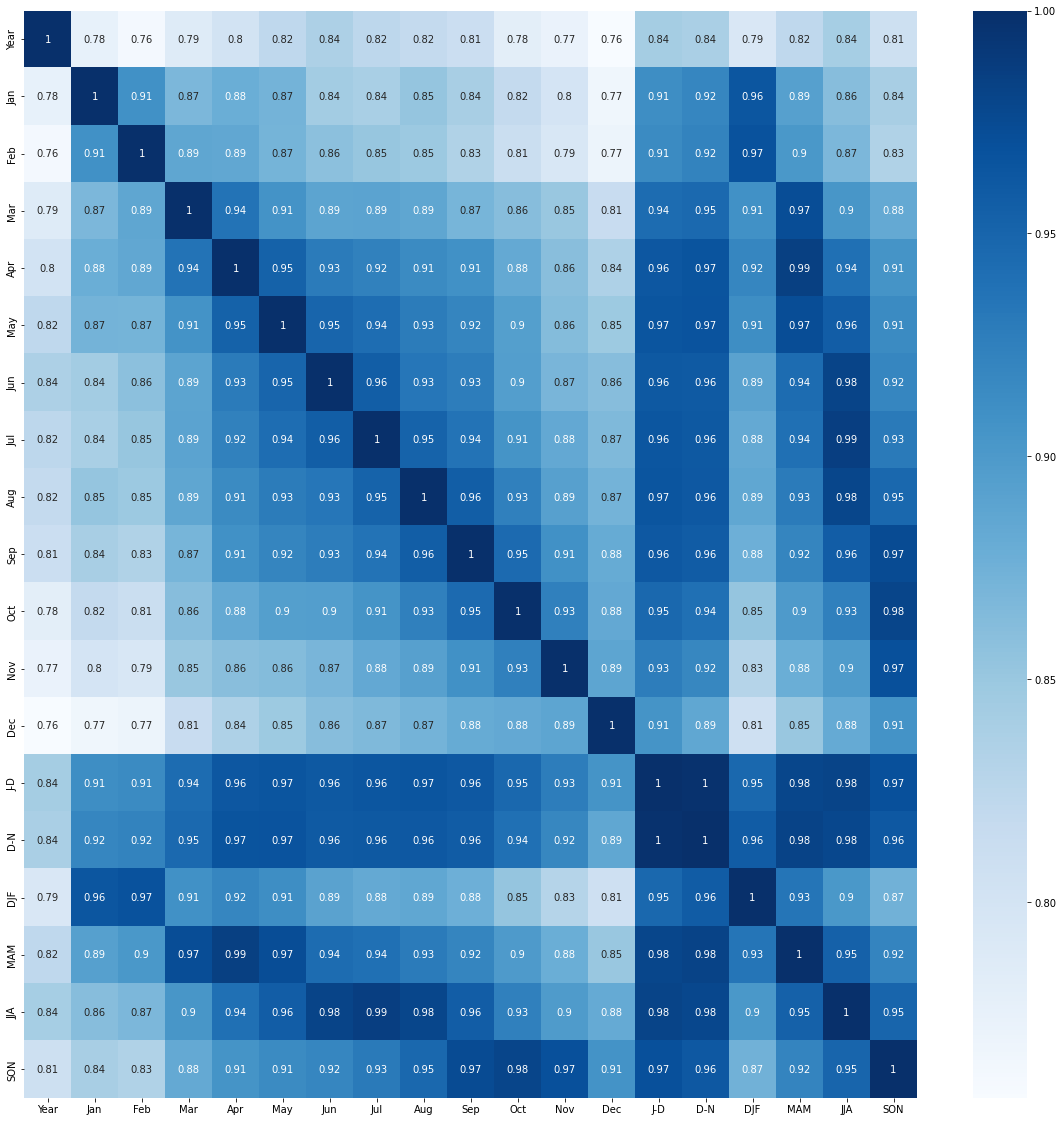

In [28]:
plt.figure(figsize = (20,20))
sns.heatmap(tempcorr, cmap = 'Blues', annot= True)
;

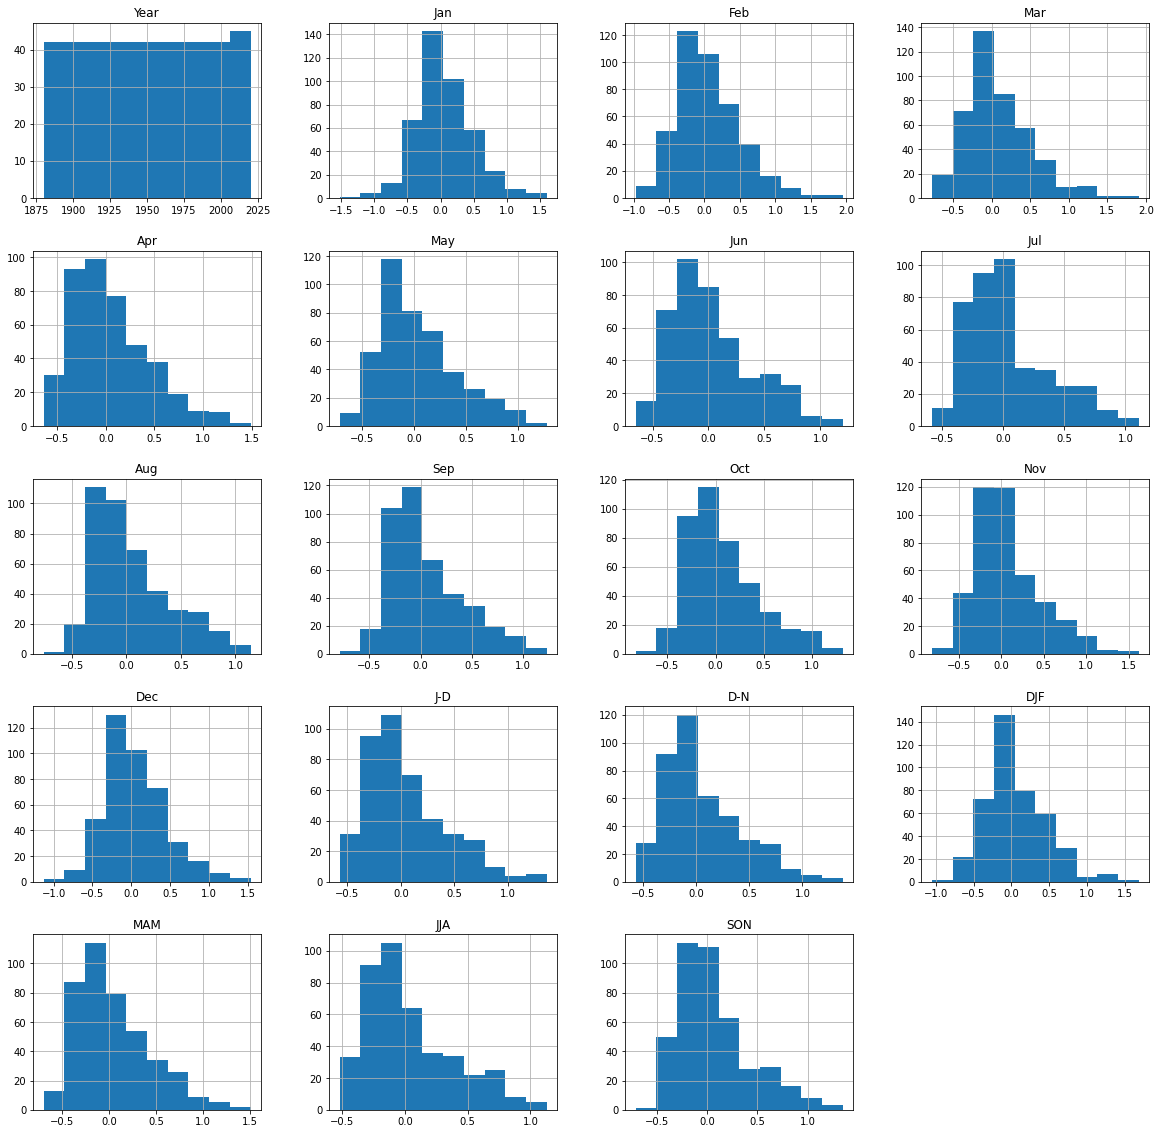

In [29]:
temp2.hist(bins = 10, figsize = (20,20))
plt.xticks(rotation = 45);

In [30]:
temp_cols = temp2.select_dtypes('number').columns
temp_cols

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON'],
      dtype='object')

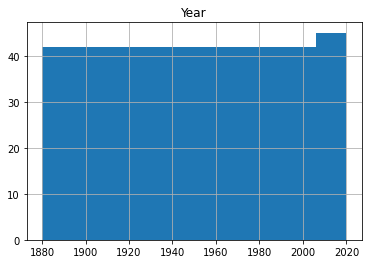

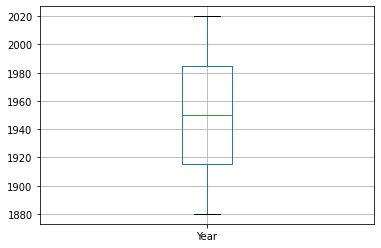

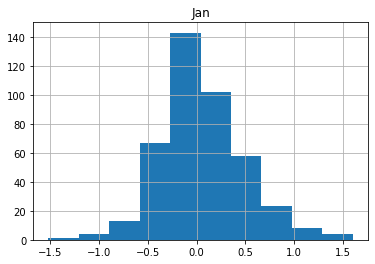

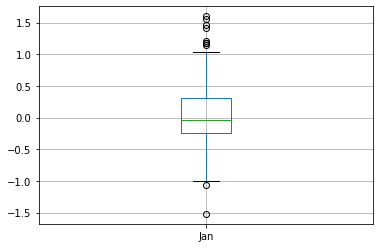

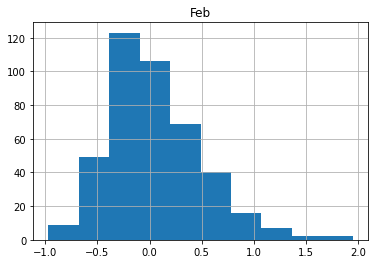

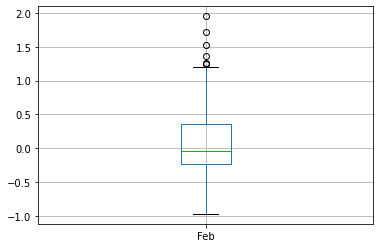

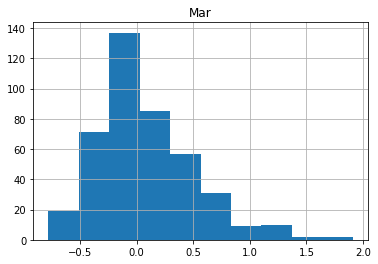

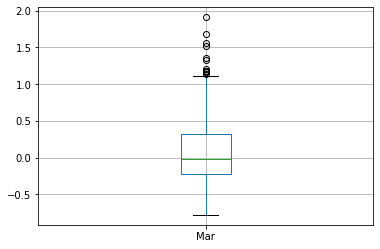

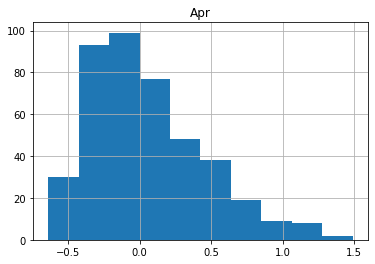

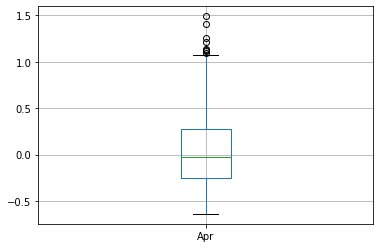

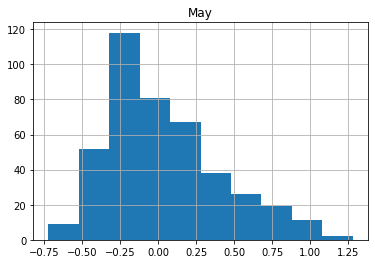

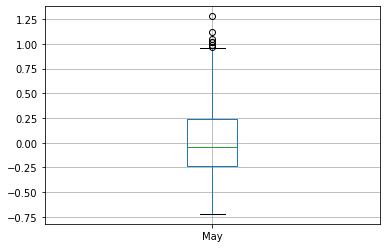

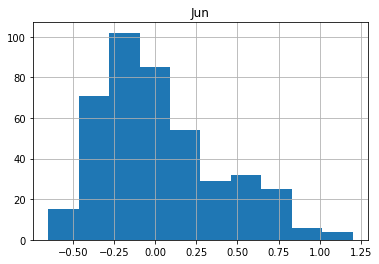

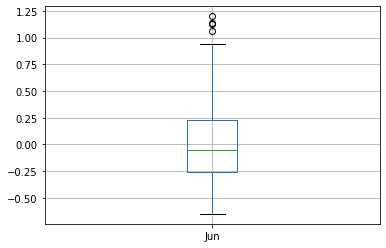

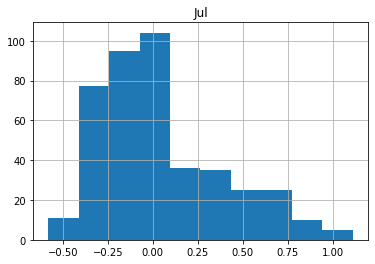

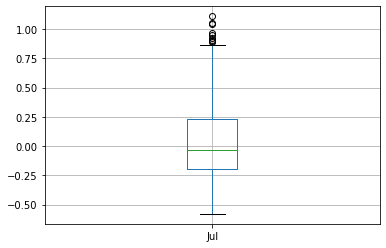

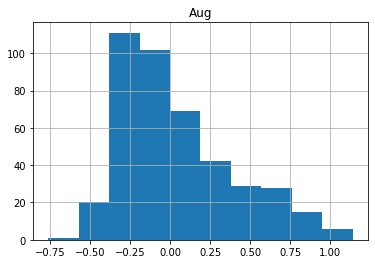

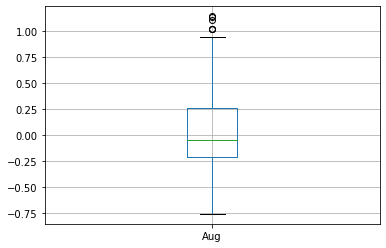

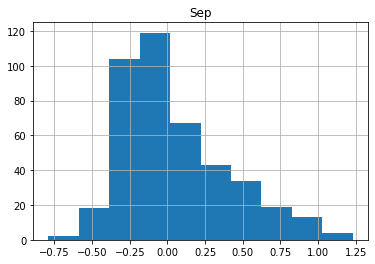

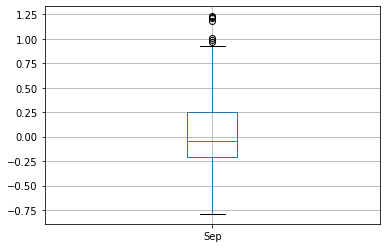

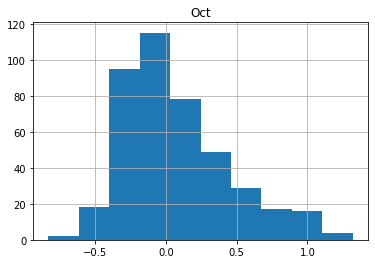

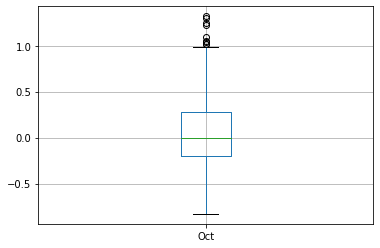

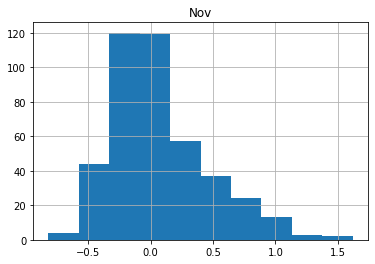

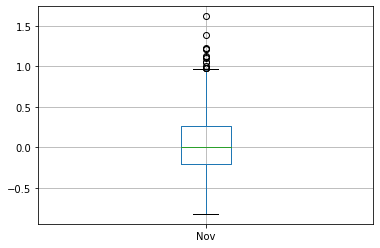

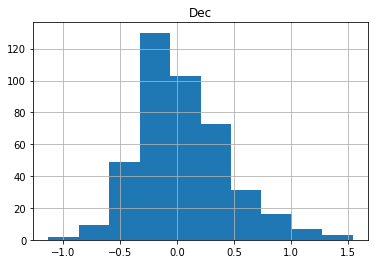

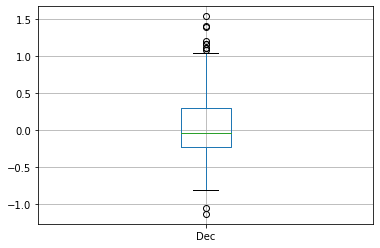

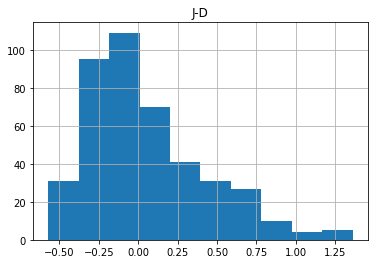

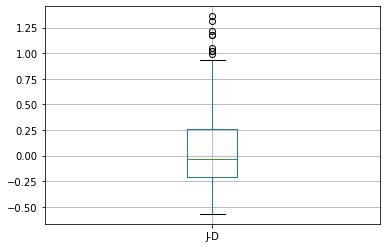

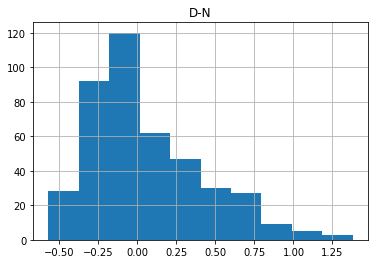

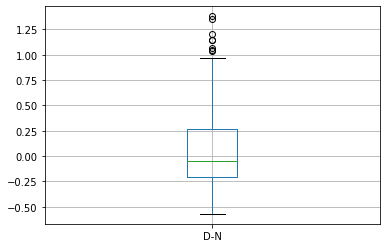

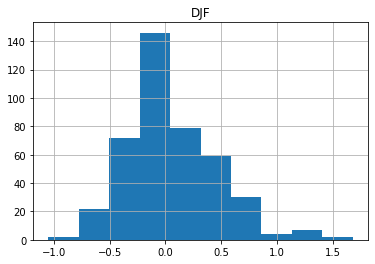

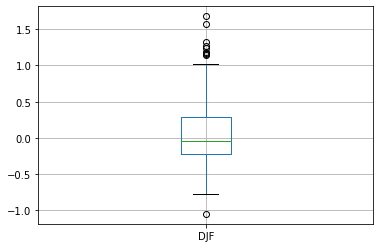

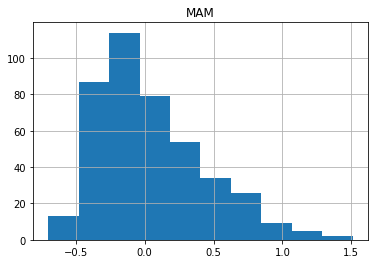

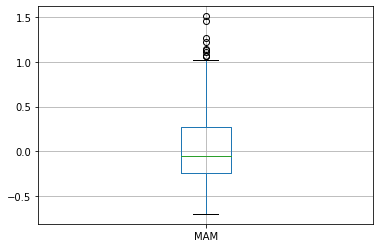

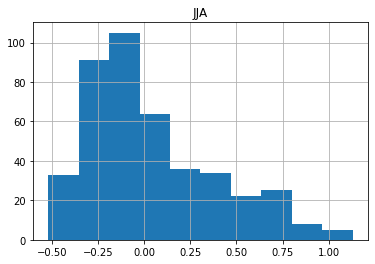

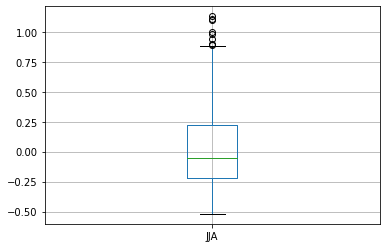

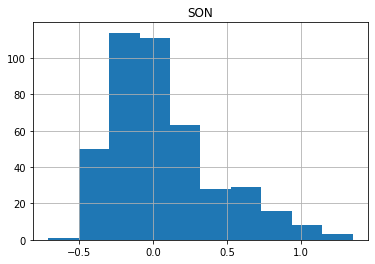

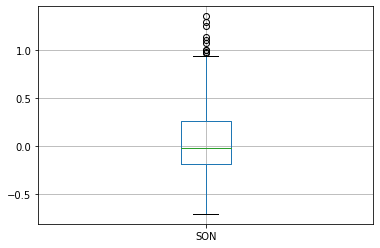

In [31]:
for col in temp_cols:
  temp2.hist(column = col)
  plt.show()
  temp2.boxplot (column = col)
  plt.show()

In [32]:
thecolumns = temp2.columns
thecolumns

Index(['Hemisphere', 'Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA',
       'SON'],
      dtype='object')

In [33]:
maryear = temp2.groupby(['Mar', 'Year'])[['MAM']].sum()
maryear

,,MAM
Mar,Year,
-0.78,1898,-0.43
-0.74,1917,-0.70
-0.71,1886,-0.46
-0.69,1908,-0.48
-0.67,1892,-0.45
...,...,...
1.35,2016,1.14
1.52,2017,1.22
1.56,2019,1.27


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c53fbdd10>]],
      dtype=object)

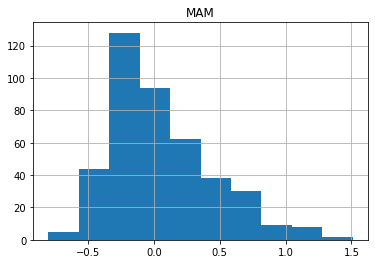

In [34]:
maryear.hist()

In [35]:
globe = temp2.groupby(['Hemisphere'])[['MAM']].sum()
globe

,MAM
Hemisphere,
Global,7.45
Northern,12.13
Southern,2.74


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c537dc650>]],
      dtype=object)

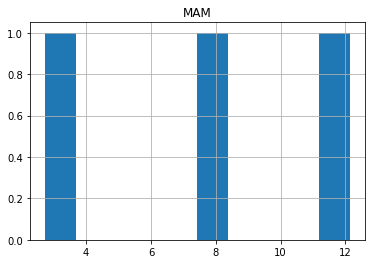

In [36]:
globe.hist()

In [37]:
year = temp2.groupby(['Year'])[['MAM']].sum()
year

,MAM
Year,
1880,-0.30
1881,0.17
1882,-0.24
1883,-0.44
1884,-1.09
...,...
2016,3.43
2017,3.03
2018,2.61


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c510ac290>]],
      dtype=object)

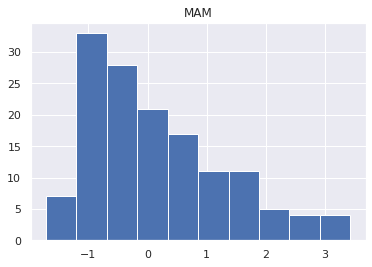

In [47]:
sns.set()
year.hist()

In [39]:
temp2nov = temp2['Nov'].values
temp2mar = temp2['Mar'].values
temp2year = temp2['Year'].values
temp2global = temp2['Hemisphere'] == 'Global'
temp2north = temp2['Hemisphere'] == 'Northern'
temp2south = temp2['Hemisphere'] == 'Southern'
temp2yearglob = temp2[temp2year & temp2global]
#mardf = temp2.loc[temp2mar, :]
#novdf = temp2.loc[temp2nov, :]

<Figure size 1440x1440 with 0 Axes>

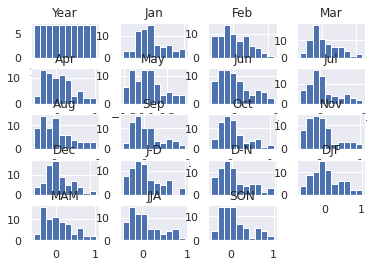

In [50]:
sns.set()
temp2yearglob.hist();

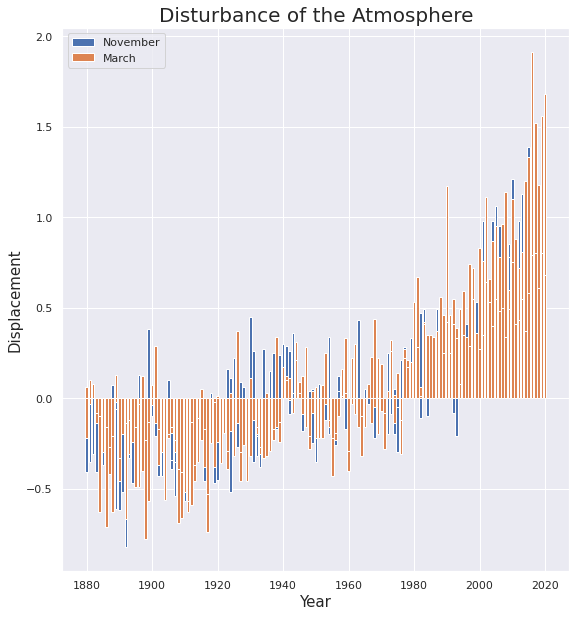

In [54]:
plt.figure(figsize = (20,10))

plt.subplot (1,2,1);
plt.bar(temp2year, temp2nov, label = 'November');
plt.bar(temp2year, temp2mar, label = 'March');
plt.legend(loc = 2);
plt.title('Disturbance of the Atmosphere', fontsize = 20)
plt.ylabel('Displacement', fontsize = 15)
plt.xlabel('Year', fontsize = 15);

In [42]:
temp2marserie = temp2['Mar'] == True
temp2novserie = temp2['Nov'] == True
temp2yearserie = temp2['Year'] == True

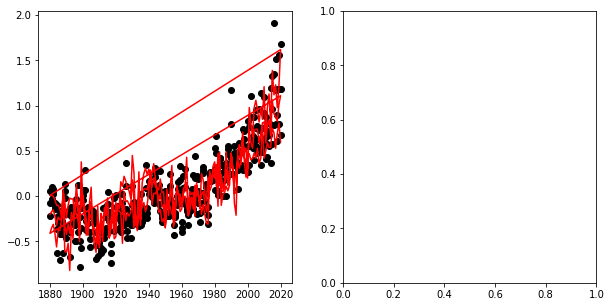

In [43]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5));
axes[0].plot(temp2year,temp2nov,  c = 'r');
axes[0].scatter(temp2year,temp2mar,  c = 'k');